In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import missingno as msno
import seaborn as sns
import numpy as np

In [39]:
Data=pd.read_csv('./music_genre.csv')

In [40]:
print(Data.shape)
Data.head()

(50005, 18)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [41]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

### Les variables qualitatives

In [42]:
for col in Data.select_dtypes('object'):
    print(f'{col:-<50}{Data[col].unique()}')

artist_name---------------------------------------['Röyksopp' 'Thievery Corporation' 'Dillon Francis' ... 'Darshan Raval'
 'Powers Pleasant' 'Millonario']
track_name----------------------------------------["Röyksopp's Night Out" 'The Shining Path' 'Hurricane' ...
 'Drama (feat. Drake)' "Lovin' Me (feat. Smiggz)" 'Hip Hop Hooray']
key-----------------------------------------------['A#' 'D' 'G#' 'C#' 'F#' 'B' 'G' 'F' 'A' 'C' 'E' 'D#' nan]
mode----------------------------------------------['Minor' 'Major' nan]
tempo---------------------------------------------['100.889' '115.00200000000001' '127.994' ... '112.97' '167.655'
 '99.20100000000001']
obtained_date-------------------------------------['4-Apr' '3-Apr' '5-Apr' '1-Apr' nan '0/4']
music_genre---------------------------------------['Electronic' 'Anime' nan 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues'
 'Rock' 'Classical' 'Hip-Hop']


### Les valeurs manquantes

In [43]:
def count_percent(data):
  df_cols = pd.DataFrame({'Count Missing': data.isnull().sum(),
                        'Percent Missing': data.isnull().sum()*100/data.shape[0]})
  return df_cols

count_percent(Data)

,Count Missing,Percent Missing
instance_id,5,0.009999
artist_name,5,0.009999
track_name,5,0.009999
popularity,5,0.009999
acousticness,5,0.009999
danceability,5,0.009999
duration_ms,5,0.009999
energy,5,0.009999
instrumentalness,5,0.009999
key,5,0.009999


<AxesSubplot:>

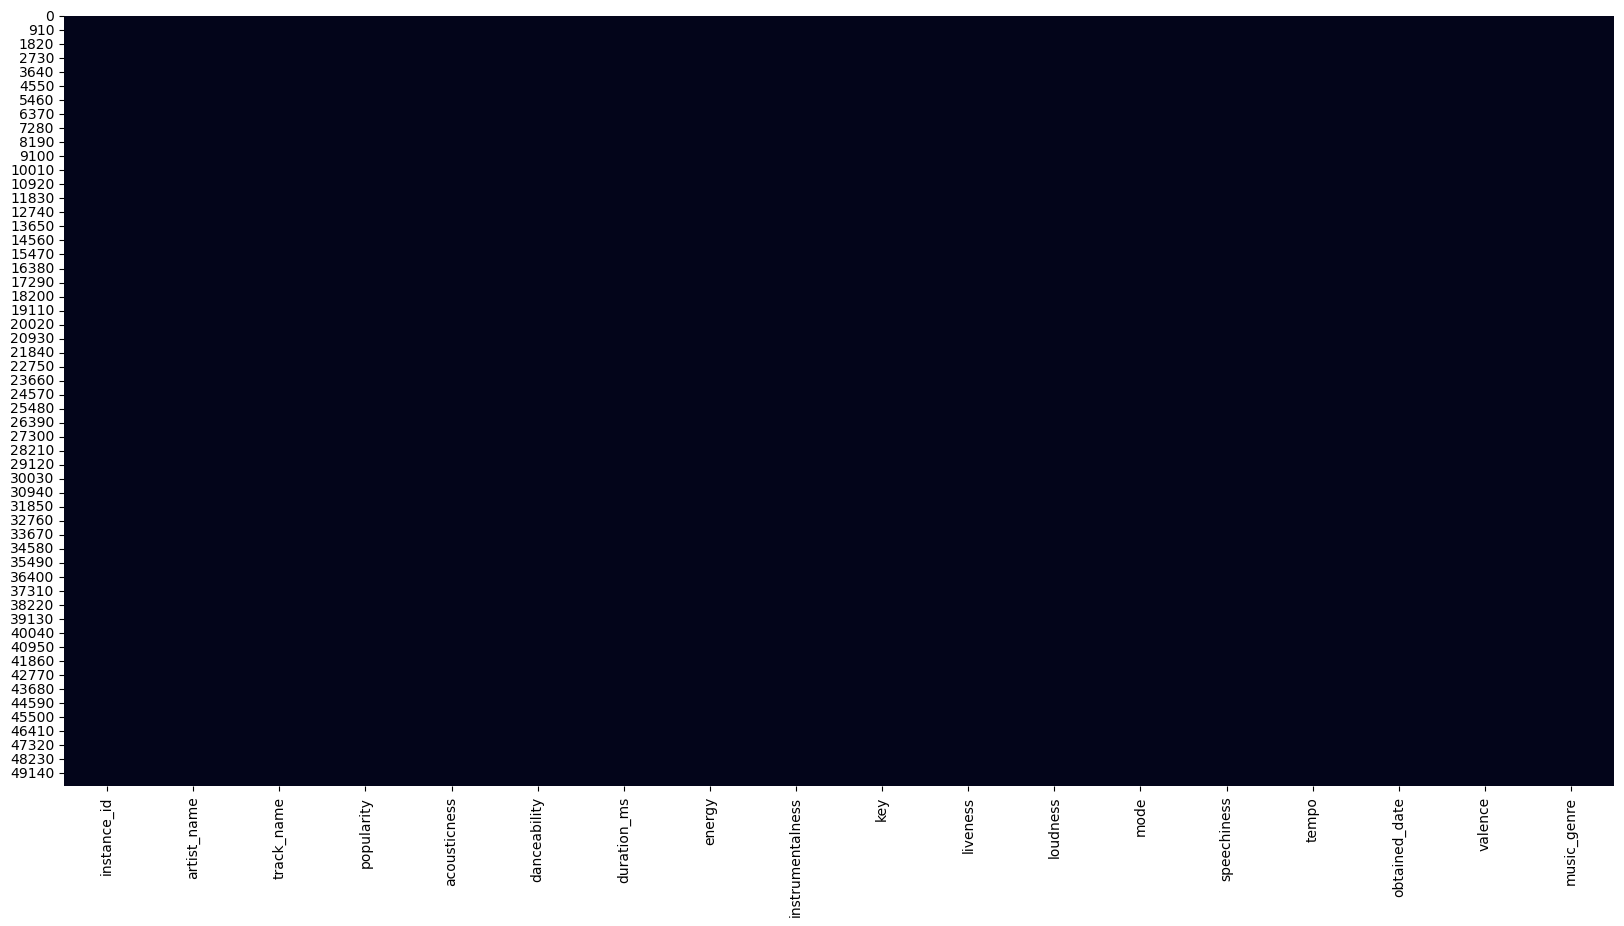

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(Data.isna(),cbar=False)

In [45]:
m_cols = count_percent(Data)
print(m_cols[m_cols['Count Missing']>0],'\n')

                  Count Missing  Percent Missing
instance_id                   5         0.009999
artist_name                   5         0.009999
track_name                    5         0.009999
popularity                    5         0.009999
acousticness                  5         0.009999
danceability                  5         0.009999
duration_ms                   5         0.009999
energy                        5         0.009999
instrumentalness              5         0.009999
key                           5         0.009999
liveness                      5         0.009999
loudness                      5         0.009999
mode                          5         0.009999
speechiness                   5         0.009999
tempo                         5         0.009999
obtained_date                 5         0.009999
valence                       5         0.009999
music_genre                   5         0.009999 



In [46]:
Data[Data.isna().any(axis=1)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
Data=Data.dropna()

In [48]:
m_cols = count_percent(Data)
print(m_cols[m_cols['Count Missing']>0],'\n')

Empty DataFrame
Columns: [Count Missing, Percent Missing]
Index: [] 



### Exploratory Data Analysis EDA + Feature engineering